In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\Downloads\Dataset\data1\Travel.csv")
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## Treating Null Values

### 1. AGE

In [6]:
df["Age"].mean()

37.62226512226512

In [7]:
df["Age"].median()

36.0

In [8]:
df["Age"].mode()

0    35.0
dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

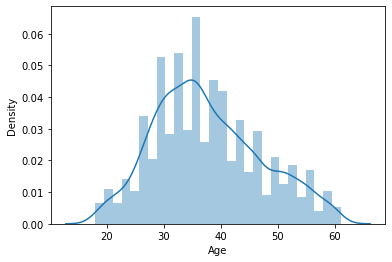

In [9]:
sns.distplot(df["Age"])

#### As there are less outliers in Age column, we will replace the null values with mean.
https://medium.com/bycodegarage/a-comprehensive-guide-on-handling-missing-values-b1257a4866d1

In [10]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [11]:
df["Age"].isnull().sum()

0

### 2. TypeofContact

In [12]:
df["TypeofContact"]

0          Self Enquiry
1       Company Invited
2          Self Enquiry
3       Company Invited
4          Self Enquiry
             ...       
4883       Self Enquiry
4884    Company Invited
4885       Self Enquiry
4886       Self Enquiry
4887       Self Enquiry
Name: TypeofContact, Length: 4888, dtype: object

<AxesSubplot:>

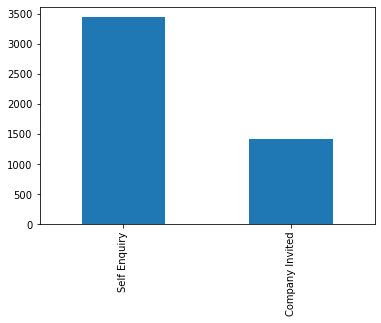

In [13]:
df["TypeofContact"].value_counts().plot(kind='bar')

In [14]:
df["TypeofContact"]=df["TypeofContact"].fillna("Self Enquiry") # filled with max occuring element

In [15]:
df["TypeofContact"].isnull().sum() # no null left

0

### 3. DurationOfPitch

In [16]:
df['DurationOfPitch'].isnull().sum()

251

<AxesSubplot:xlabel='DurationOfPitch', ylabel='Density'>

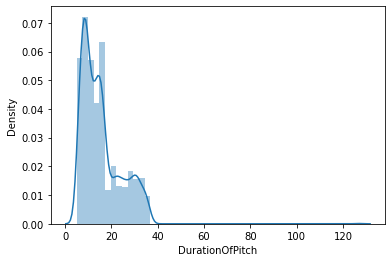

In [17]:
sns.distplot(df['DurationOfPitch'])

<AxesSubplot:xlabel='DurationOfPitch'>

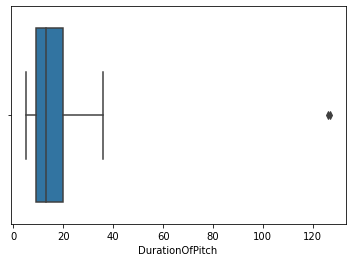

In [18]:
sns.boxplot(df['DurationOfPitch']) # showong the outliers

In [19]:
df['DurationOfPitch'].max()

127.0

In [20]:
df['DurationOfPitch'].median()

13.0

In [21]:
df['DurationOfPitch'].mean()

15.490834591330602

In [22]:
df['DurationOfPitch'].mode()

0    9.0
dtype: float64

In [23]:
df[df['DurationOfPitch']==df['DurationOfPitch'].max()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3878,203878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0


In [24]:
df['DurationOfPitch'][3878]=df['DurationOfPitch'].median()

In [25]:
df[df['DurationOfPitch']==df['DurationOfPitch'].max()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
1434,201434,0,37.622265,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0


In [26]:
df['DurationOfPitch'][1434]=df['DurationOfPitch'].median()

#### Now the outliers are removed from 'DurationOfPitch'

In [27]:
df[df['DurationOfPitch']==df['DurationOfPitch'].max()]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2505,202505,0,39.0,Company Invited,1,36.0,Salaried,Female,3,4.0,Deluxe,3.0,Single,3.0,0,3,1,1.0,Manager,21084.0
2585,202585,0,46.0,Self Enquiry,1,36.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,7.0,0,2,1,1.0,Executive,22130.0
2643,202643,0,39.0,Self Enquiry,1,36.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,24939.0
2648,202648,1,39.0,Self Enquiry,1,36.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,2.0,1,3,0,2.0,Manager,25351.0
2703,202703,1,32.0,Company Invited,1,36.0,Small Business,Male,4,5.0,Basic,4.0,Unmarried,2.0,0,3,1,3.0,Executive,22157.0
2715,202715,1,48.0,Company Invited,1,36.0,Salaried,Male,3,4.0,Standard,4.0,Divorced,3.0,1,3,1,1.0,Senior Manager,30527.0
2796,202796,0,49.0,Self Enquiry,3,36.0,Small Business,Female,4,4.0,Standard,3.0,Divorced,5.0,0,4,0,1.0,Senior Manager,31182.0
2853,202853,0,43.0,Company Invited,1,36.0,Salaried,Female,4,4.0,Deluxe,3.0,Married,4.0,0,3,1,3.0,Manager,23234.0
2868,202868,0,58.0,Self Enquiry,3,36.0,Small Business,Male,3,5.0,Super Deluxe,3.0,Married,5.0,0,3,0,1.0,AVP,32796.0
2869,202869,0,51.0,Self Enquiry,1,36.0,Salaried,Male,3,5.0,Super Deluxe,3.0,Divorced,NaN,0,5,1,2.0,AVP,35724.0


<AxesSubplot:xlabel='DurationOfPitch'>

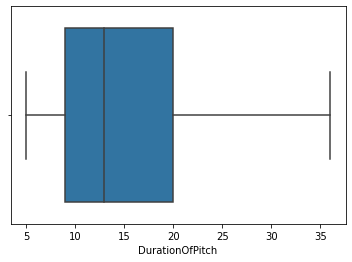

In [28]:
sns.boxplot(df['DurationOfPitch']) # Now the outliers are removed

In [29]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(),inplace=True)

In [30]:
df['DurationOfPitch'].isnull().sum() # no null left

0

### 4. NumberOfFollowups

In [31]:
df['NumberOfFollowups'].isnull().sum() # very less null values

45

<AxesSubplot:xlabel='NumberOfFollowups'>

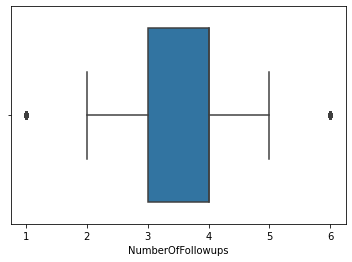

In [32]:
sns.boxplot(df['NumberOfFollowups'])

In [33]:
df[df['NumberOfFollowups']<2]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
566,200566,1,47.0,Company Invited,3,33.000000,Salaried,Female,3,1.0,Deluxe,3.0,Unmarried,5.0,1,4,1,2.0,Manager,21397.0
574,200574,0,34.0,Self Enquiry,1,6.000000,Salaried,Female,3,1.0,Basic,3.0,Single,3.0,0,2,0,0.0,Executive,18280.0
578,200578,0,38.0,Company Invited,1,8.000000,Salaried,Female,3,1.0,Deluxe,5.0,Single,7.0,1,2,1,2.0,Manager,20980.0
582,200582,0,40.0,Company Invited,1,15.441881,Small Business,Female,2,1.0,Deluxe,4.0,Divorced,2.0,0,3,0,1.0,Manager,NaN
585,200585,1,23.0,Self Enquiry,1,12.000000,Salaried,Male,3,1.0,Basic,5.0,Divorced,2.0,1,3,1,2.0,Executive,16601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,202349,0,60.0,Self Enquiry,3,13.000000,Small Business,Male,2,1.0,Deluxe,3.0,Married,1.0,1,5,0,0.0,Manager,20220.0
2361,202361,0,44.0,Self Enquiry,1,8.000000,Salaried,Female,3,1.0,Basic,3.0,Married,2.0,0,4,1,2.0,Executive,17011.0
2383,202383,1,45.0,Self Enquiry,3,19.000000,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,7.0,1,3,1,0.0,AVP,33824.0
2395,202395,1,42.0,Company Invited,1,7.000000,Salaried,Female,3,1.0,Standard,4.0,Single,2.0,0,3,1,0.0,Senior Manager,17372.0


In [34]:
df[df['NumberOfFollowups']>5]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2470,202470,1,33.0,Company Invited,1,23.0,Salaried,Female,4,6.0,Basic,5.0,Unmarried,3.0,1,4,1,3.0,Executive,22597.0
2486,202486,1,27.0,Self Enquiry,1,32.0,Salaried,Male,3,6.0,Basic,3.0,Single,3.0,0,2,1,2.0,Executive,20971.0
2527,202527,0,39.0,Company Invited,1,13.0,Small Business,Female,4,6.0,Deluxe,3.0,Married,2.0,1,2,0,3.0,Manager,24007.0
2529,202529,0,57.0,Self Enquiry,1,14.0,Salaried,Male,3,6.0,Standard,3.0,Unmarried,6.0,0,2,0,1.0,Senior Manager,25938.0
2555,202555,1,35.0,Company Invited,1,14.0,Salaried,Male,4,6.0,Deluxe,3.0,Unmarried,3.0,1,5,1,2.0,Manager,24752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,204857,1,47.0,Self Enquiry,3,22.0,Small Business,Male,3,6.0,Deluxe,3.0,Married,8.0,1,1,0,2.0,Manager,22101.0
4864,204864,1,32.0,Self Enquiry,2,29.0,Salaried,Male,3,6.0,Basic,3.0,Married,3.0,0,1,0,2.0,Executive,28530.0
4865,204865,1,42.0,Company Invited,3,16.0,Salaried,Male,3,6.0,Super Deluxe,3.0,Married,2.0,0,5,1,2.0,AVP,24829.0
4867,204867,1,45.0,Self Enquiry,3,8.0,Salaried,Male,3,6.0,Deluxe,4.0,Single,8.0,0,3,0,2.0,Manager,21040.0


<AxesSubplot:xlabel='NumberOfFollowups', ylabel='Density'>

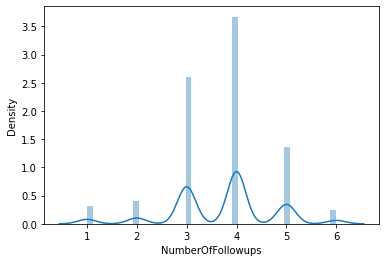

In [35]:
sns.distplot(df['NumberOfFollowups'])

In [36]:
df['NumberOfFollowups'].nunique()

6

In [37]:
df['NumberOfFollowups'].mode() # watching at the above distribution we must fill the null values with mode

0    4.0
dtype: float64

In [38]:
df['NumberOfFollowups']=df['NumberOfFollowups'].fillna(4.0)

In [39]:
df['NumberOfFollowups'].isnull().sum() # no null left

0

### 5. PreferredPropertyStar

In [40]:
df['PreferredPropertyStar'].nunique()

3

<AxesSubplot:xlabel='PreferredPropertyStar', ylabel='Density'>

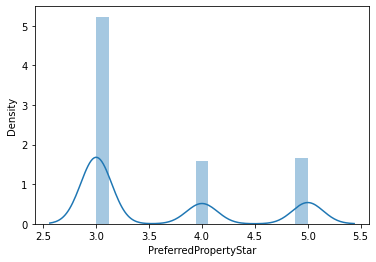

In [41]:
sns.distplot(df['PreferredPropertyStar'])

In [42]:
df['PreferredPropertyStar'].mode()

0    3.0
dtype: float64

In [43]:
df['PreferredPropertyStar'].fillna(3.0,inplace=True)

In [44]:
df['PreferredPropertyStar'].isnull().sum() # no null left

0

### 6. NumberOfTrips

In [45]:
df['NumberOfTrips'].isnull().sum()

140

<AxesSubplot:xlabel='NumberOfTrips', ylabel='Density'>

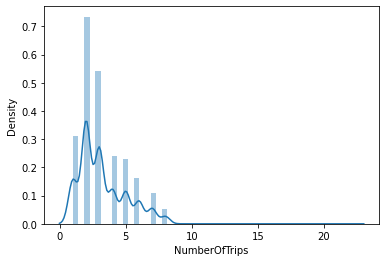

In [46]:
sns.distplot(df['NumberOfTrips'])

In [47]:
df['NumberOfTrips'].nunique()

12

In [48]:
df['NumberOfTrips'].mode()

0    2.0
dtype: float64

In [49]:
df['NumberOfTrips'].fillna(3.0,inplace=True)

In [50]:
df['NumberOfTrips'].isnull().sum() # no null left

0

### 7. NumberOfChildrenVisiting 

In [51]:
df['NumberOfChildrenVisiting'].isnull().sum()

66

In [52]:
df['NumberOfChildrenVisiting'].nunique()

4

In [53]:
df['NumberOfChildrenVisiting'].mode()

0    1.0
dtype: float64

<AxesSubplot:xlabel='NumberOfChildrenVisiting', ylabel='Density'>

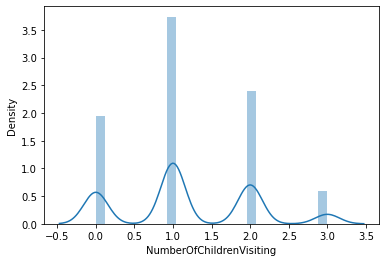

In [54]:
sns.distplot(df['NumberOfChildrenVisiting'])

In [55]:
df['NumberOfChildrenVisiting'].fillna(1.0,inplace=True)

In [56]:
df['NumberOfChildrenVisiting'].isnull().sum()

0

### 8. MonthlyIncome

In [57]:
df['MonthlyIncome'].isnull().sum()

233

In [58]:
df['MonthlyIncome'].nunique()

2475

In [59]:
df['MonthlyIncome'].median()

22347.0

In [60]:
df['MonthlyIncome'].mean()

23619.85349087003

<AxesSubplot:xlabel='MonthlyIncome'>

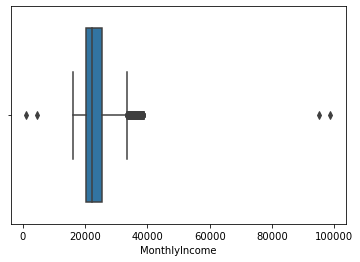

In [61]:
sns.boxplot(df['MonthlyIncome'])

In [62]:
df[df['MonthlyIncome']<5000]

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2586,202586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0


In [63]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

In [64]:
df['MonthlyIncome'].isnull().sum()

0

## Converting Categorical to Numerical

### Method 1. One Hot Encoding

In [65]:
cat_col = [col for col in df.columns if df[col].dtypes=='O']

In [66]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [67]:
df[cat_col]

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,Self Enquiry,Small Business,Male,Basic,Divorced,Executive
...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager
4884,Company Invited,Salaried,Male,Basic,Single,Executive
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager
4886,Self Enquiry,Small Business,Male,Basic,Single,Executive


In [68]:
cat_col_encoded = pd.get_dummies(df[cat_col],drop_first=True)  # we drop the first column because it will cause data duplicacy

In [69]:
cat_col_encoded

,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,Gender_Female,Gender_Male,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0
4884,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
4885,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4886,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0


### Method 2. Replacing Categories with ordinal numbers.

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [71]:
enc = OrdinalEncoder()
enc.fit(df[cat_col])
x_trans = enc.transform(df[cat_col])
x_trans

array([[1., 2., 1., 1., 2., 2.],
       [0., 2., 2., 1., 0., 2.],
       [1., 0., 2., 0., 2., 1.],
       ...,
       [1., 2., 1., 3., 1., 3.],
       [1., 3., 2., 0., 2., 1.],
       [1., 2., 2., 0., 3., 1.]])

### Method 3. Label Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()
le.fit(df['TypeofContact'])

LabelEncoder()

In [74]:
list(le.classes_)

['Company Invited', 'Self Enquiry']

In [75]:
le.transform(df['TypeofContact'])

array([1, 0, 1, ..., 1, 1, 1])

In [76]:
le.fit(df['Occupation'])

LabelEncoder()

In [77]:
le.classes_

array(['Free Lancer', 'Large Business', 'Salaried', 'Small Business'],
      dtype=object)

In [78]:
le.transform(df['Occupation'])

array([2, 2, 0, ..., 2, 3, 2])

In [79]:
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [80]:
le.fit(df['Gender'])

LabelEncoder()

In [81]:
le.transform(df['Gender'])

array([1, 2, 2, ..., 1, 2, 2])

In [82]:
le.fit(df['ProductPitched'])

LabelEncoder()

In [83]:
le.classes_

array(['Basic', 'Deluxe', 'King', 'Standard', 'Super Deluxe'],
      dtype=object)

In [84]:
le.transform(df['ProductPitched'])

array([1, 1, 0, ..., 3, 0, 0])